In [1]:
COLAB=False #if running on https://colab.research.google.com/notebooks/welcome.ipynb

# Imports

In [2]:
import os
import numpy as np
import pandas as pd
from sys import path
from copy import copy, deepcopy
import warnings
import lightgbm as lgb

warnings.filterwarnings("ignore")

In [3]:
if COLAB == True :
    from google.colab import drive
    drive.mount('/content/drive')
    

## Directories

In [4]:
model_dir = '../sample_code_submission/'
result_dir = '../sample_result_submission/' 
problem_dir = '../ingestion_program/'  
score_dir = '../scoring_program/'
visualizer_dir = '../visualize/'

### Add directories to path

In [5]:
path.append(model_dir) 
path.append(problem_dir)
path.append(score_dir)
path.append("../")
path.append(visualizer_dir)


**Imports**

In [6]:
# from data_loader import get_settings_from_json
from datagen_temp import DataGenerator
from ingestion import Ingestion
from visualise import *

In [7]:
# Init Ingestion
ingestion = Ingestion()

# Start timer
ingestion.start_timer()


In [8]:
# load test set
ingestion.load_train_set()

# load test set
ingestion.load_test_sets()


[*] Loading Train data
[*] Loading Test data


## Visualise Data 

In [9]:
Train_data_vis = Dataset_visualise(ingestion.train_set["data"],ingestion.train_set["weights"],ingestion.train_set["labels"],"Train Set")

In [10]:
Train_data_vis.examine_dataset()

[*] --- Dataset name : Train Set
[*] --- List of all features


Index(['PRI_lep_pt', 'PRI_lep_eta', 'PRI_lep_phi', 'PRI_electron_flag',
       'PRI_muon_flag', 'PRI_had_pt', 'PRI_had_eta', 'PRI_had_phi',
       'PRI_jet_leading_pt', 'PRI_jet_leading_eta', 'PRI_jet_leading_phi',
       'PRI_n_jets', 'PRI_jet_subleading_pt', 'PRI_jet_subleading_eta',
       'PRI_jet_subleading_phi', 'PRI_jet_all_pt', 'PRI_met', 'PRI_met_phi',
       'DER_mass_transverse_lep_had', 'DER_mass_vis', 'DER_pt_h',
       'DER_deltaeta_jet_jet', 'DER_mass_jet_jet', 'DER_prodeta_jet_jet',
       'DER_deltar_lep_had', 'DER_pt_tot', 'DER_sum_pt',
       'DER_pt_ratio_lep_had', 'DER_mass_transverse_met_lep',
       'DER_deltar_had_lep', 'DER_met_phi_centrality',
       'DER_lep_eta_centrality'],
      dtype='object')

[*] --- Examples of all features


,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_electron_flag,PRI_muon_flag,PRI_had_pt,PRI_had_eta,PRI_had_phi,PRI_jet_leading_pt,PRI_jet_leading_eta,...,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_lep_had,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_had,DER_mass_transverse_met_lep,DER_deltar_had_lep,DER_met_phi_centrality,DER_lep_eta_centrality
0,50.0999,1.255640,0.257353,0,1,42.2988,1.358410,-0.670554,275.3810,-0.558399,...,520.681585,-0.853429,0.933581,8.728596,525.7687,1.184428,58.351462,0.933581,1.364331,5.795115e-01
1,28.2447,-0.903858,0.644935,1,0,41.6925,-1.127460,-2.689500,41.6925,-1.127460,...,-7.000000,-7.000000,2.957210,35.244647,69.9372,0.677453,4.982735,2.957216,1.341604,-7.000000e+00
2,34.8037,-1.560660,1.215240,0,1,28.4524,-1.856900,-2.470590,48.0899,-1.115880,...,69.682175,2.072078,2.614190,28.830370,139.7984,1.223225,51.674643,2.614194,1.355845,9.606150e-01
3,38.1375,0.258473,-2.724710,1,0,27.5778,0.586741,0.603050,67.8627,2.652690,...,545.921027,-4.297968,2.973600,36.032009,235.3833,1.382906,17.608784,2.973600,-1.410033,9.855498e-01
4,22.1230,-1.803210,0.667257,1,0,44.7008,0.200277,3.114310,44.7008,0.200277,...,79.754334,0.229978,3.162600,41.524409,140.4502,0.494913,17.430965,3.162598,-1.412058,1.367538e-12


[*] --- Description of all features


,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_electron_flag,PRI_muon_flag,PRI_had_pt,PRI_had_eta,PRI_had_phi,PRI_jet_leading_pt,PRI_jet_leading_eta,...,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_lep_had,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_had,DER_mass_transverse_met_lep,DER_deltar_had_lep,DER_met_phi_centrality,DER_lep_eta_centrality
count,169054.000000,169054.000000,169054.000000,169054.000000,169054.000000,169054.000000,169054.000000,169054.000000,169054.000000,169054.000000,...,169054.000000,169054.000000,169054.000000,169054.000000,169054.000000,169054.000000,169054.000000,169054.000000,169054.000000,169054.000000
mean,33.479433,-0.000507,-0.005781,0.447727,0.552273,44.437843,0.001504,0.006051,67.921363,0.002521,...,144.052649,-2.655057,2.587838,53.378740,174.380754,0.869890,20.625603,2.587838,0.492422,-2.592275
std,17.803014,1.189034,1.814443,0.497261,0.497261,23.559975,1.217755,1.811379,59.223828,1.558320,...,272.617073,4.262315,0.711813,37.110582,142.653941,0.543041,20.276850,0.711813,1.117184,3.641702
min,20.000100,-2.499920,-3.141570,0.000000,0.000000,22.917500,-2.673120,-3.141570,22.939800,-4.890660,...,-7.000000,-21.895106,0.575897,0.134850,43.072100,0.037949,-0.000000,0.575889,-1.414214,-7.000000
25%,23.807525,-0.904779,-1.579858,0.000000,0.000000,31.045800,-0.940476,-1.559857,35.523525,-1.129405,...,-7.000000,-7.000000,2.152125,33.140148,69.656675,0.546873,5.837040,2.152119,-0.678718,-7.000000
50%,28.629600,-0.006547,-0.008554,0.000000,1.000000,38.740250,0.008643,0.021425,46.582150,0.008696,...,71.098344,-1.866642,2.842620,46.005458,139.227850,0.752582,14.359127,2.842614,1.123794,0.000002
75%,36.444450,0.900684,1.566735,1.000000,1.000000,49.459125,0.937682,1.570872,73.162150,1.131898,...,179.348069,0.470113,3.106820,62.730647,222.337550,1.034057,29.905843,3.106819,1.380591,0.465673
max,576.872000,2.499990,3.141540,1.000000,1.000000,599.825000,2.670180,3.141550,1575.320000,4.919970,...,6661.538071,17.944680,5.777640,769.308658,2869.378200,13.625782,453.918571,5.777639,1.414214,1.000000


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 432x288 with 0 Axes>

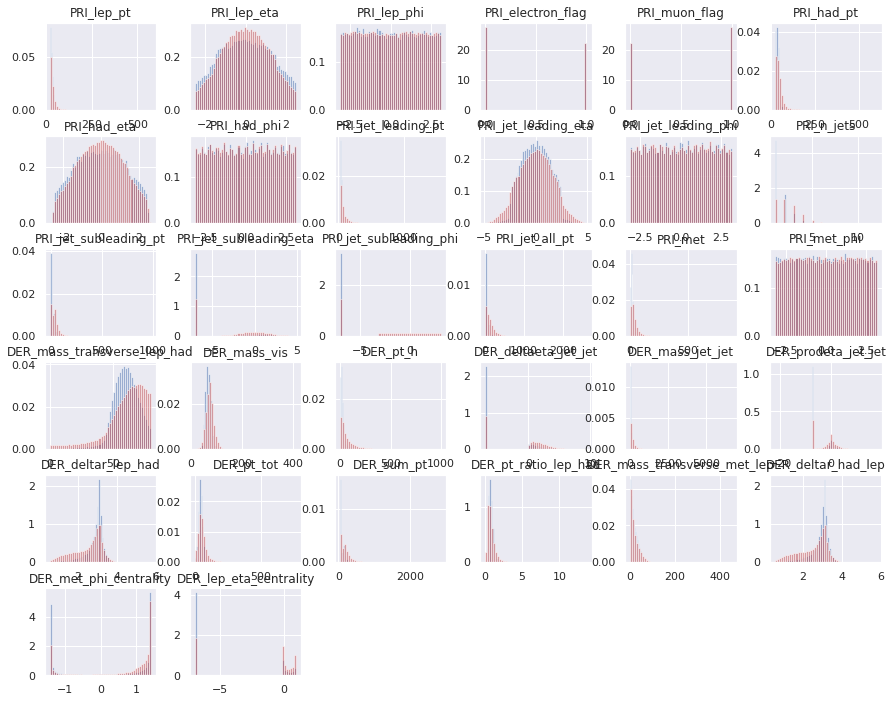

In [11]:
Train_data_vis.histogram_dataset()

Signal feature  correlation matrix


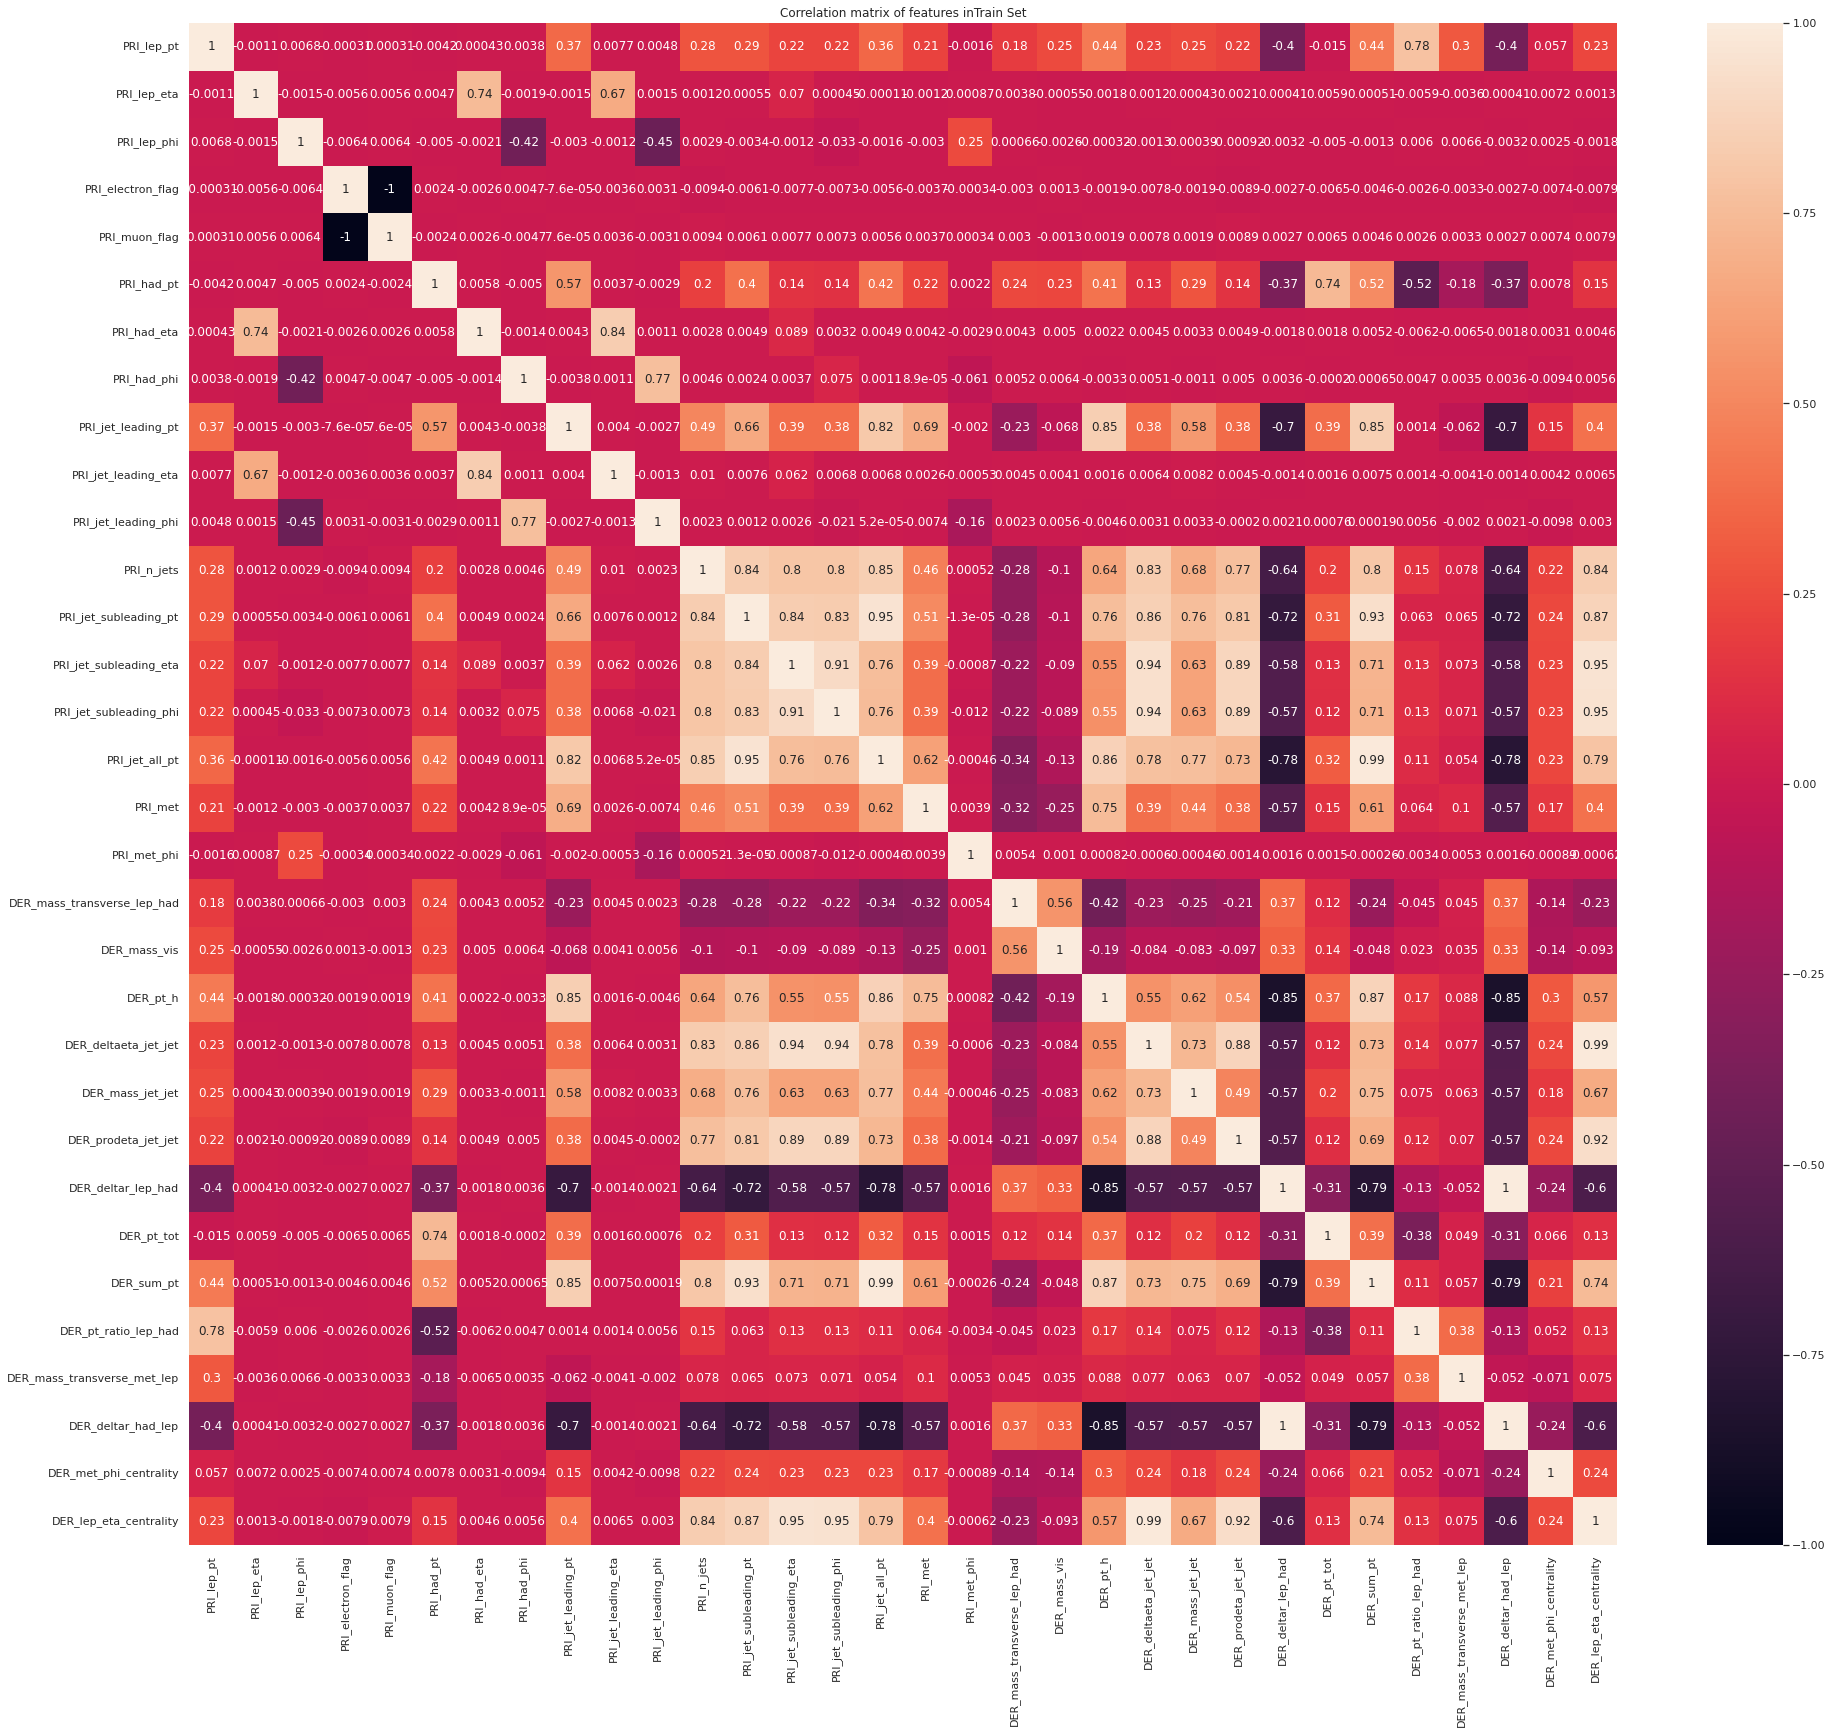

Background feature  correlation matrix


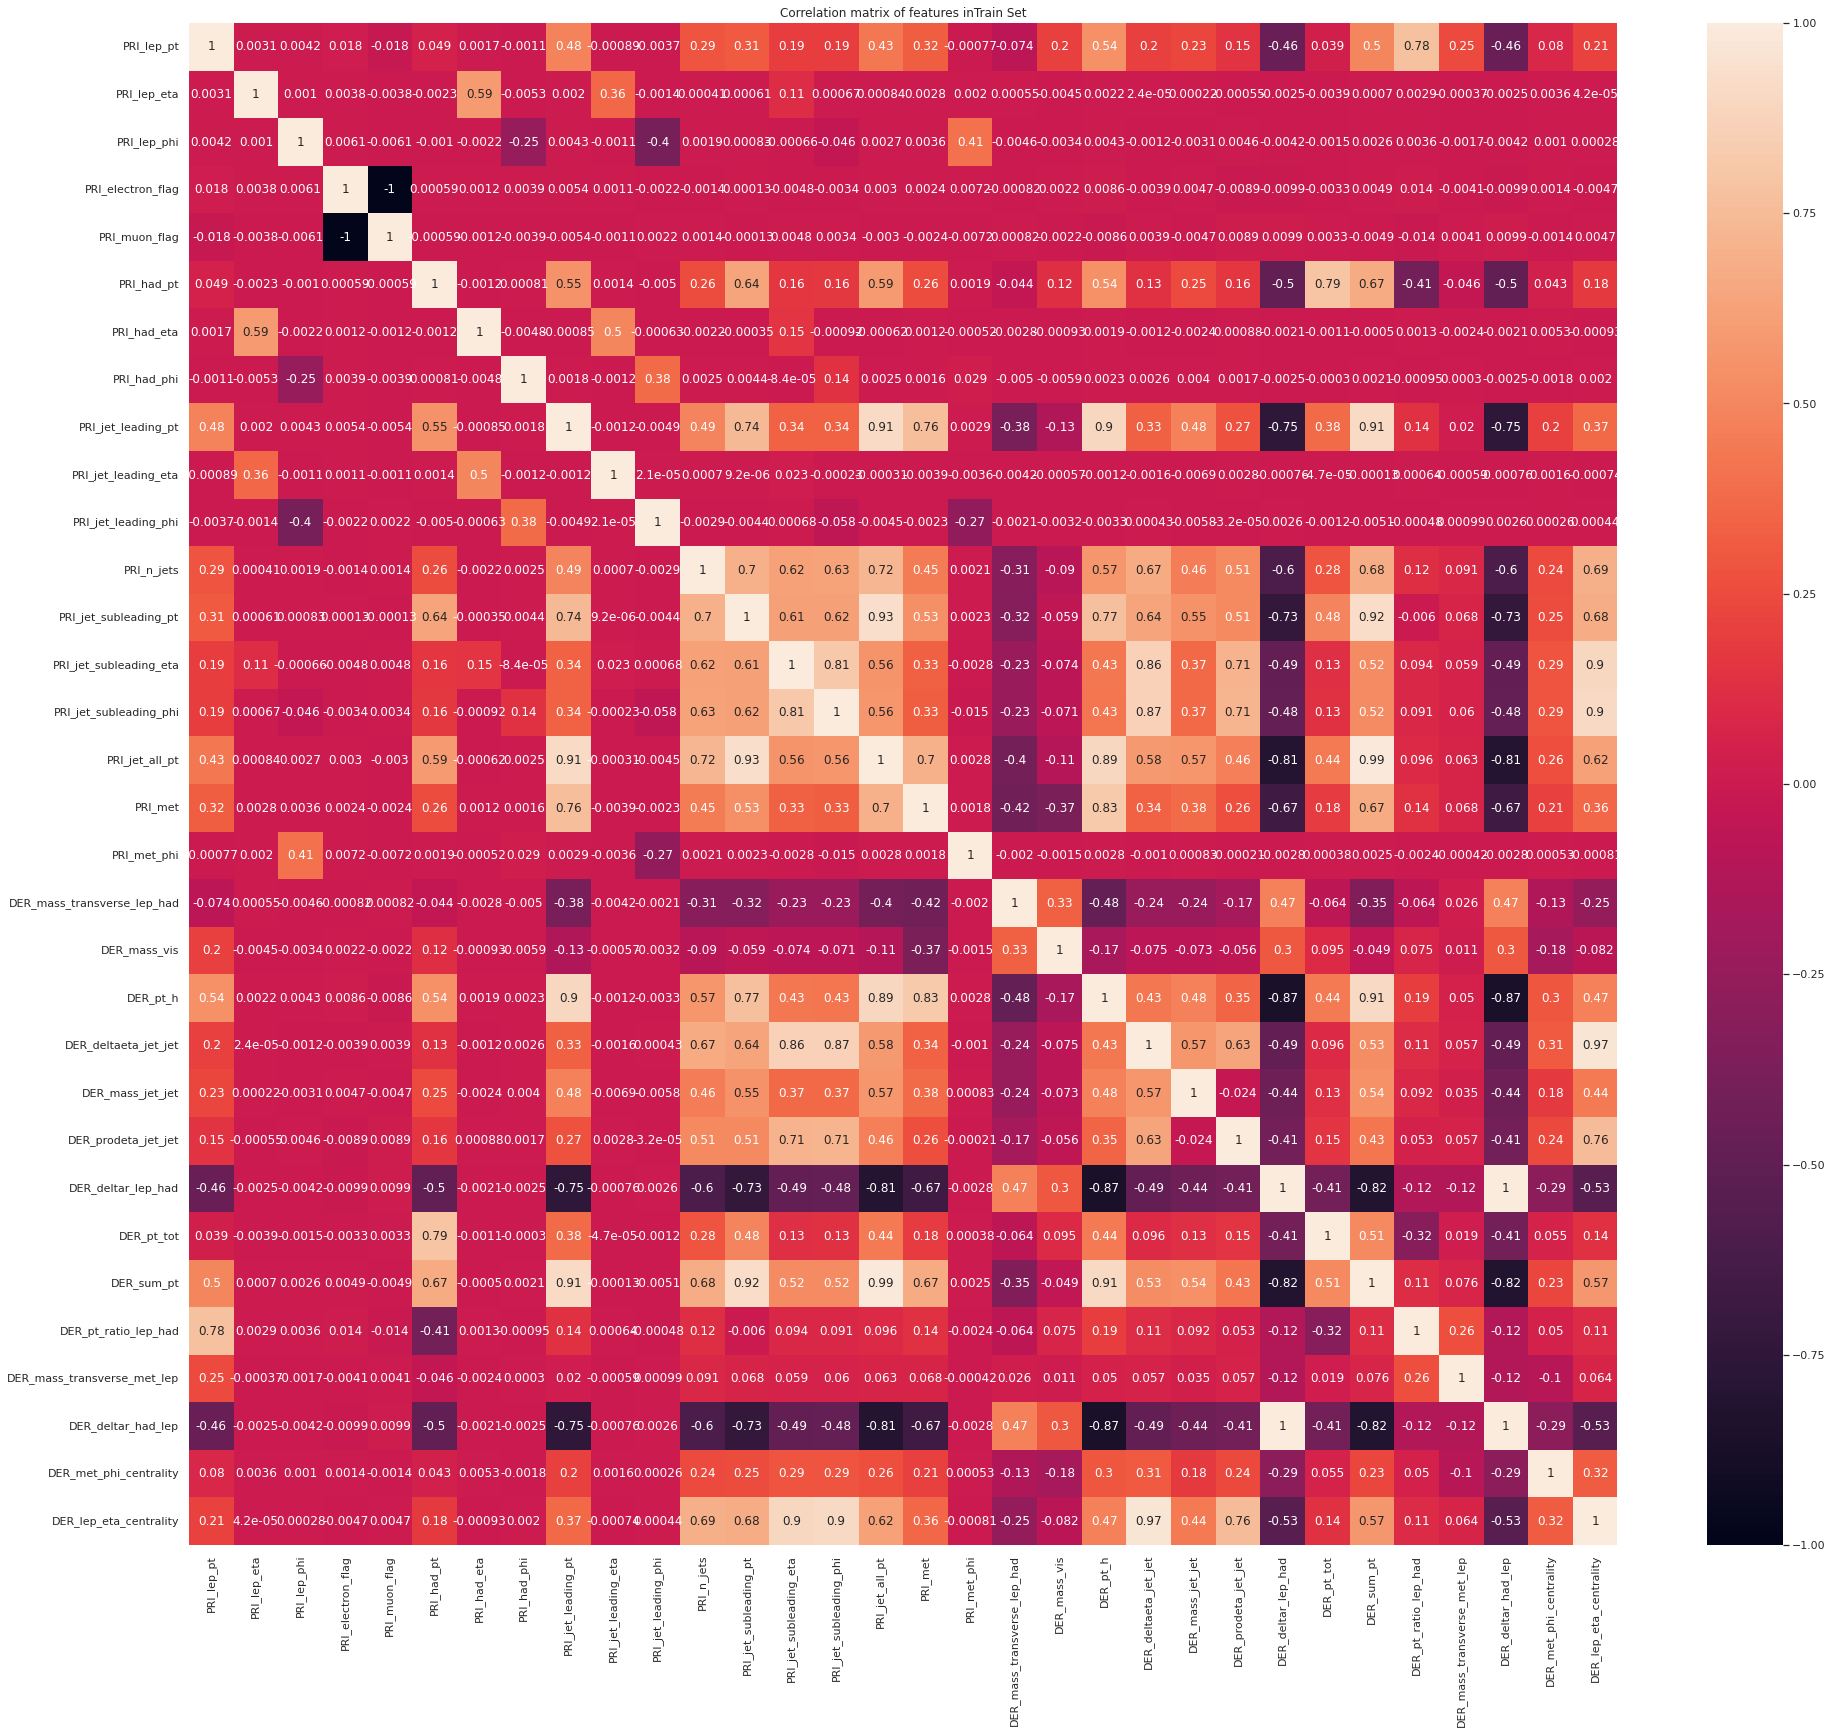

In [12]:
Train_data_vis.correlation_plots()

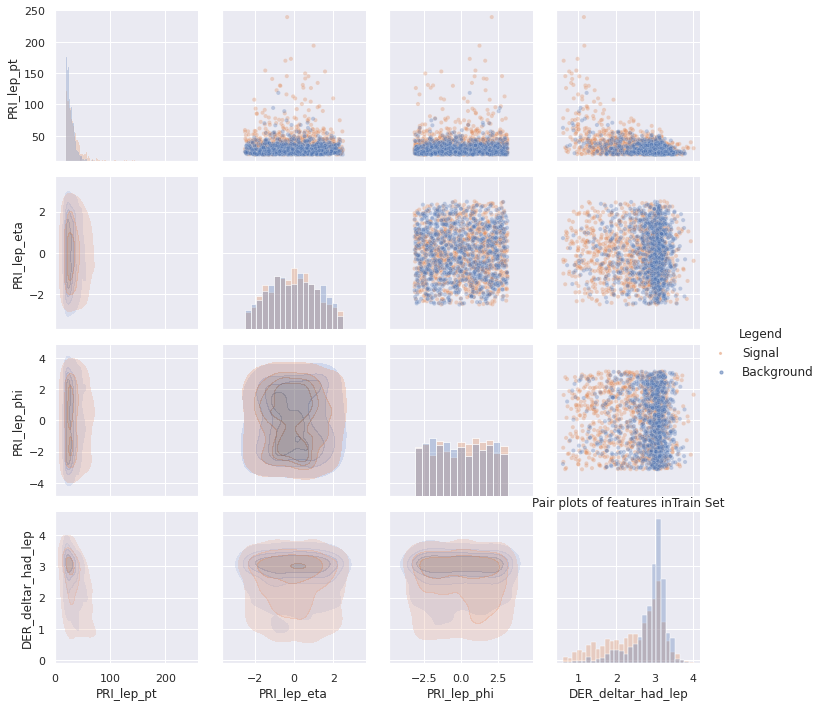

In [13]:
Train_data_vis.pair_plots(columns = ['PRI_lep_pt', 'PRI_lep_eta','PRI_lep_phi', 'DER_deltar_had_lep'])
 

In [14]:
# Train_data_vis.cluster_plot(columns = ['PRI_lep_pt', 'PRI_lep_eta','PRI_lep_phi', 'DER_deltar_had_lep'])

In [15]:
# n = 1
# for i in range(n):
#     Test_data_vis = Dataset_visualise(ingestion.test_sets[i],ingestion.test_sets_weights[i],ingestion.test_labels[i],f"Test Set {i} ")
#     Test_data_vis.examine_dataset()
#     Test_data_vis.histogram_dataset()
#     Test_data_vis.correlation_plots()
#     Test_data_vis.pair_plots()
 

## Training Model

In [16]:
# Initialize submission
ingestion.initialize_submission()

# Call fit method of submission
ingestion.fit_submission()


model = ingestion.model

[*] Initializing submitted model
[*] Calling fit method of submitted model
[*] - Generating Validation sets
Tau energy rescaling : 1.01
[*] - Intialize BDT
[*] - Train Neural Network
[*] - Intialize BDT
[*] --- Training Model
[*] --- Fitting Model
sum of signal 2860861.8101999993
sum of background 2860861.8101999997
[0]	validation_0-logloss:0.60317	validation_0-auc:0.83685	validation_1-logloss:0.63734	validation_1-auc:0.51962
[1]	validation_0-logloss:0.55414	validation_0-auc:0.84647	validation_1-logloss:0.60481	validation_1-auc:0.67151
[2]	validation_0-logloss:0.52478	validation_0-auc:0.85009	validation_1-logloss:0.60673	validation_1-auc:0.63223
[3]	validation_0-logloss:0.50642	validation_0-auc:0.85269	validation_1-logloss:0.62657	validation_1-auc:0.63363
[4]	validation_0-logloss:0.49365	validation_0-auc:0.85529	validation_1-logloss:0.61452	validation_1-auc:0.67978
[5]	validation_0-logloss:0.48499	validation_0-auc:0.85710	validation_1-logloss:0.65777	validation_1-auc:0.62261
[6]	valida

[70]	validation_0-logloss:0.40952	validation_0-auc:0.89501	validation_1-logloss:1.83432	validation_1-auc:0.54701
[71]	validation_0-logloss:0.40909	validation_0-auc:0.89526	validation_1-logloss:1.81385	validation_1-auc:0.55119
[72]	validation_0-logloss:0.40891	validation_0-auc:0.89535	validation_1-logloss:1.77698	validation_1-auc:0.54781
[73]	validation_0-logloss:0.40860	validation_0-auc:0.89552	validation_1-logloss:1.77690	validation_1-auc:0.54861
[74]	validation_0-logloss:0.40749	validation_0-auc:0.89622	validation_1-logloss:1.81850	validation_1-auc:0.54248
[75]	validation_0-logloss:0.40724	validation_0-auc:0.89637	validation_1-logloss:2.04750	validation_1-auc:0.55517
[76]	validation_0-logloss:0.40691	validation_0-auc:0.89655	validation_1-logloss:2.06016	validation_1-auc:0.55842
[77]	validation_0-logloss:0.40643	validation_0-auc:0.89684	validation_1-logloss:2.06124	validation_1-auc:0.55569
[78]	validation_0-logloss:0.40576	validation_0-auc:0.89722	validation_1-logloss:2.07490	validati

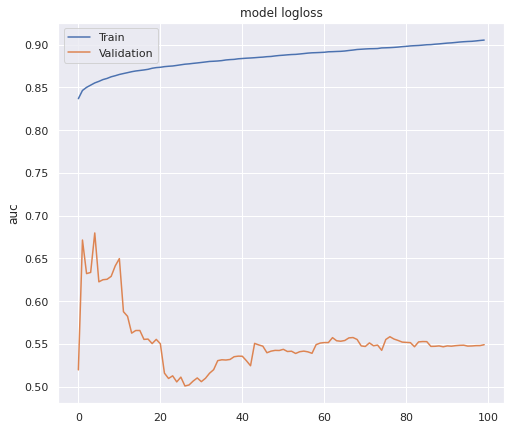

In [17]:
results = model.model.evals_result()

validationcurve(results,'auc')

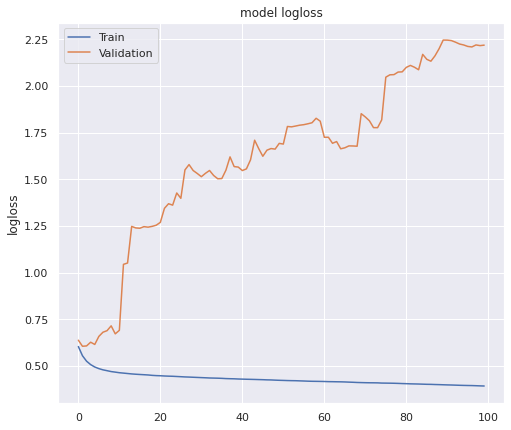

In [18]:
validationcurve(results,'logloss')

In [19]:
# lgb.plot_metric(results)

In [20]:
# Call predict method of submission
ingestion.predict_submission()

model = ingestion.model

[*] Calling predict method of submitted model
[*] - Testing
[*] - Computing Test result

[*] --- AUC test : 0.8560621745548274
[*] --- total weight test: 2871156.1554242056
[*] --- total weight train: 2870527.8620537133
[*] --- total weight mu_cals_set: 2870527.862053714
[*] --- total test signal : 10294.345224205414
[*] --- total test background train: 2860861.8102
[*] --- Significance : 17.888732179797714
[*] --- delta_mu_stat : 0.05590111081931956
[*] --- mean N: 38941.3958 --- sigma N: 196.41783254674198
[*] --- signal: 3368.121701728309 --- background: 29792.497215173014
[*] --- signal test: 3530.024891325733 --- background test: 35410.01672248105 --- N_roi 38941.3958

[*] --- mu hat test :2.7163206662432486 + 2.774637392876361 - 2.658003939610136

[*] --- AUC test : 0.8571007801358628
[*] --- total weight test: 2876327.493165943
[*] --- total weight train: 2870527.8620537133
[*] --- total weight mu_cals_set: 2870527.862053714
[*] --- total test signal : 15465.682965942407
[*] ---

## Visualise Model

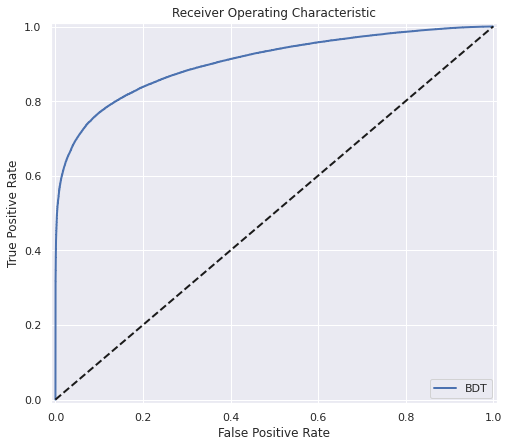

<Figure size 576x504 with 0 Axes>

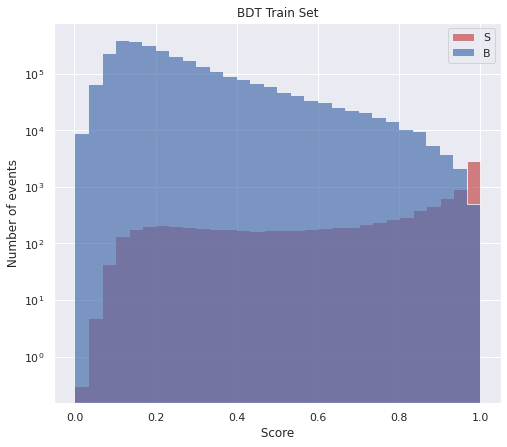

<Figure size 576x504 with 0 Axes>

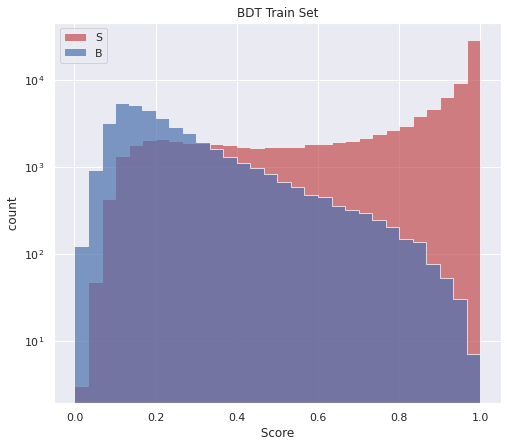

In [21]:
roc_curve_(model.train_set['score'],model.train_set['labels'] ,model.train_set['weights'],plot_label = model.model_name,color='b',lw = 2)

events_histogram(model.train_set['score'],model.train_set['labels'] ,model.train_set['weights'],plot_label = model.model_name + " Train Set")

score_histogram(model.train_set['score'],model.train_set['labels'] ,plot_label = model.model_name + " Train Set")


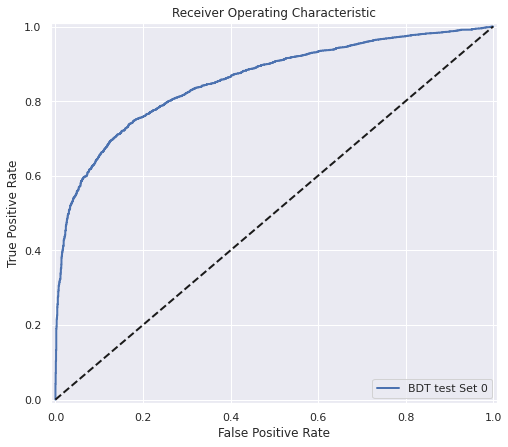

<Figure size 576x504 with 0 Axes>

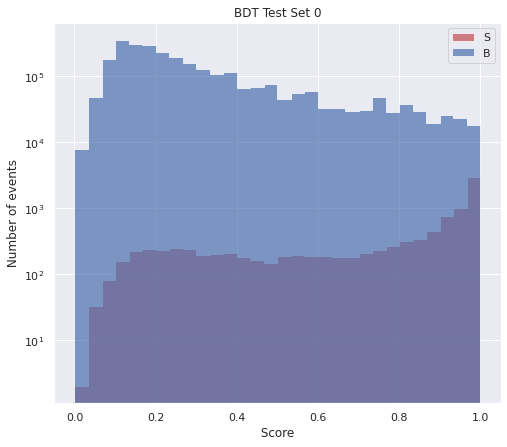

<Figure size 576x504 with 0 Axes>

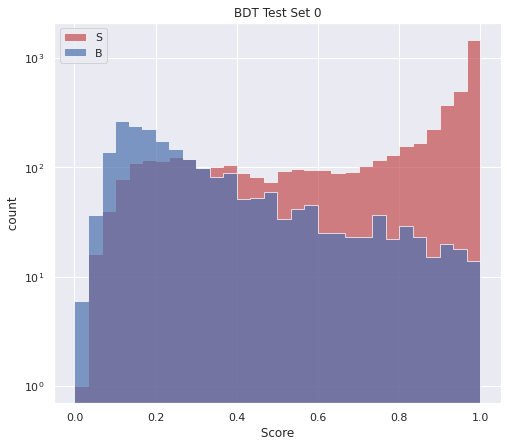

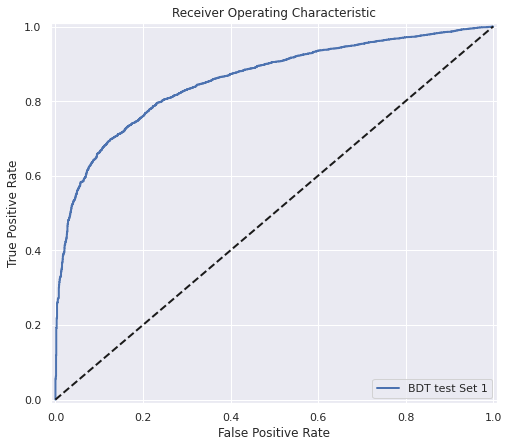

<Figure size 576x504 with 0 Axes>

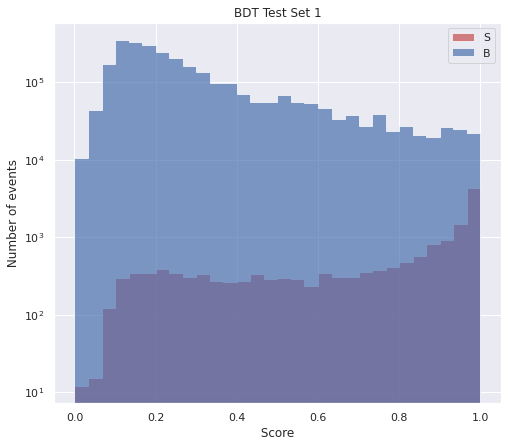

<Figure size 576x504 with 0 Axes>

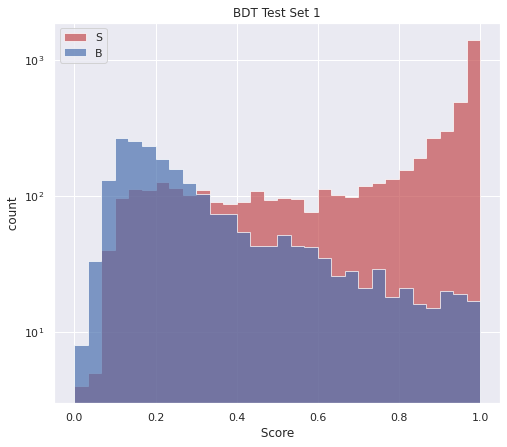

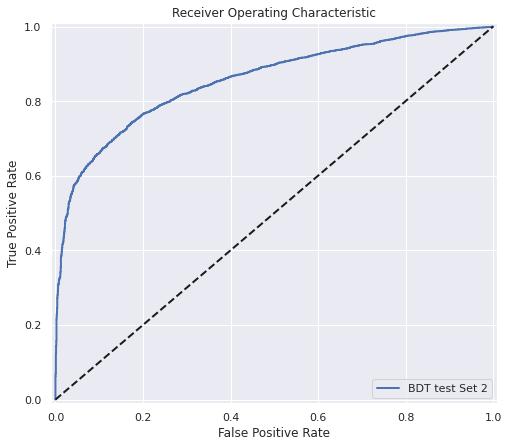

<Figure size 576x504 with 0 Axes>

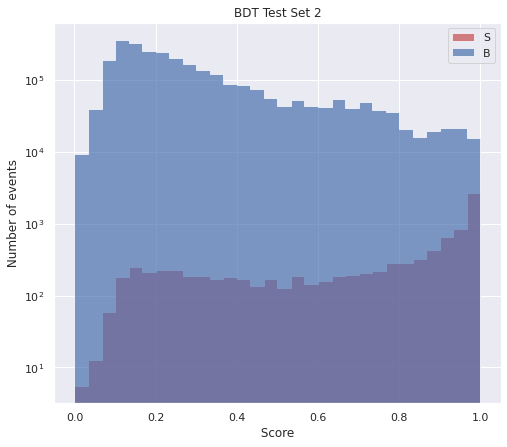

<Figure size 576x504 with 0 Axes>

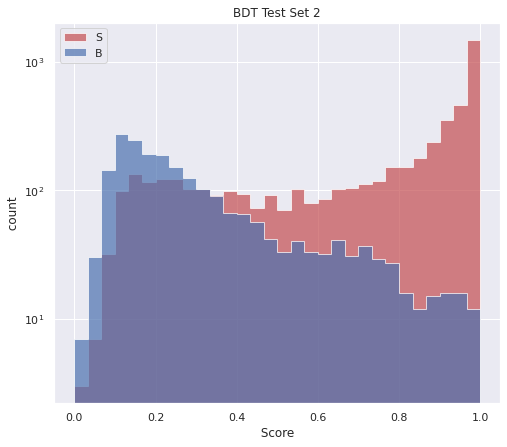

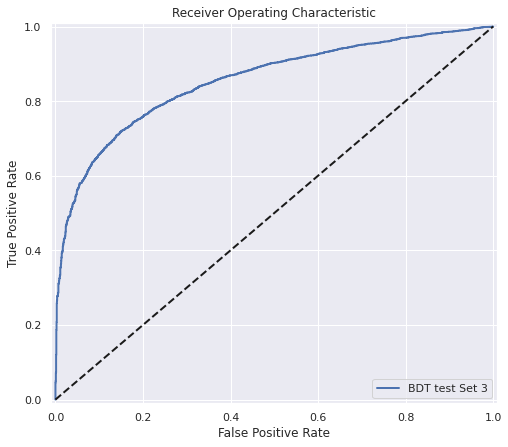

<Figure size 576x504 with 0 Axes>

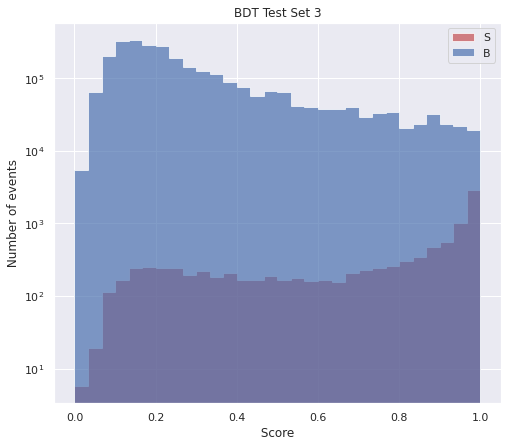

<Figure size 576x504 with 0 Axes>

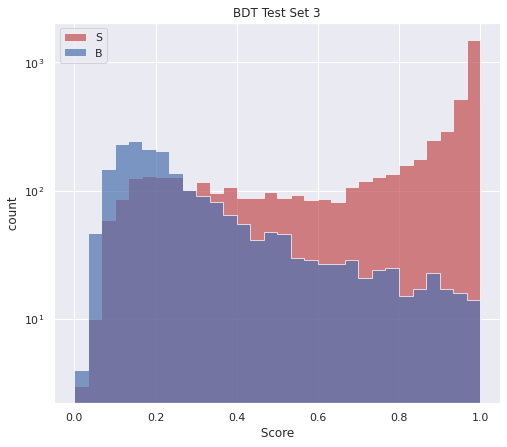

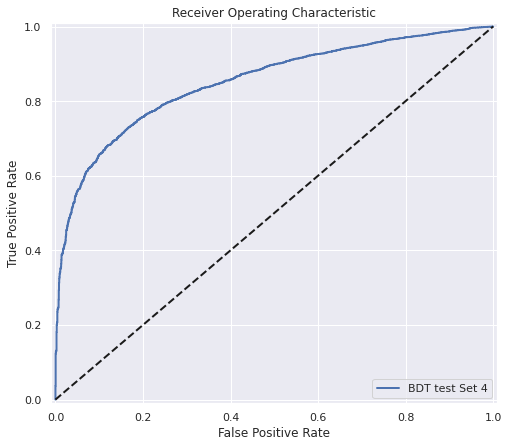

<Figure size 576x504 with 0 Axes>

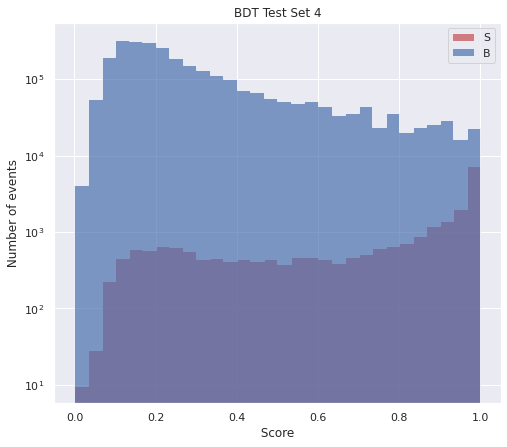

<Figure size 576x504 with 0 Axes>

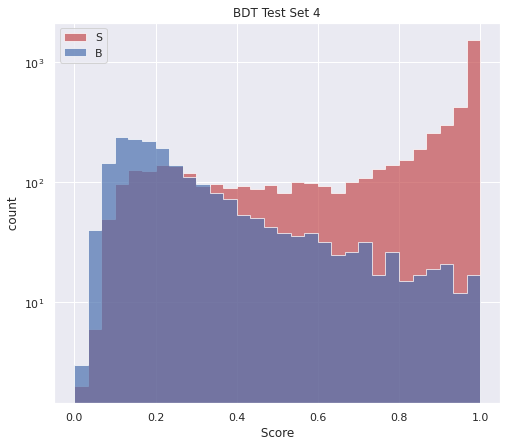

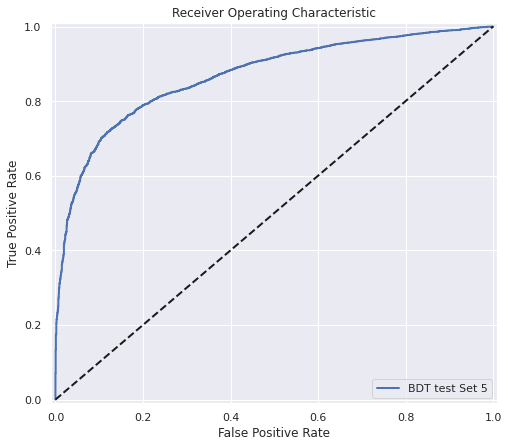

<Figure size 576x504 with 0 Axes>

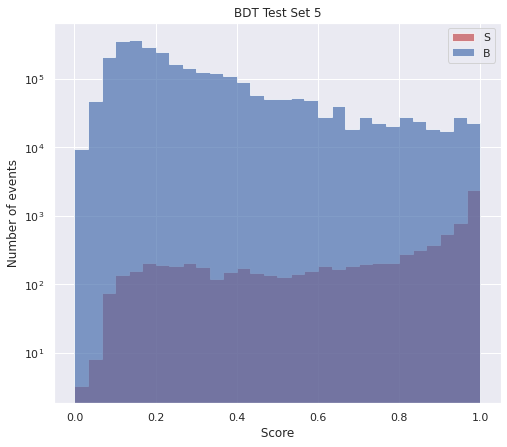

<Figure size 576x504 with 0 Axes>

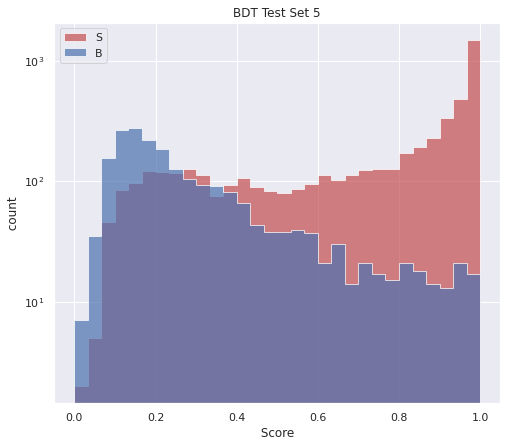

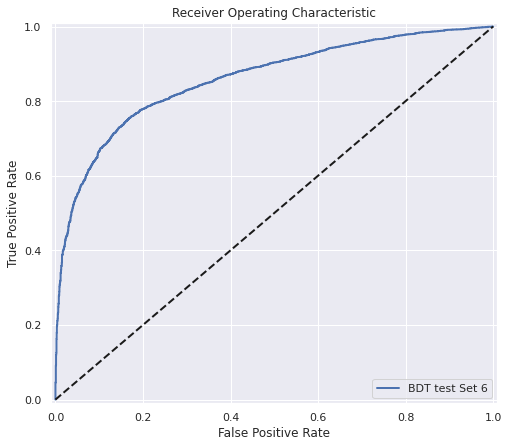

<Figure size 576x504 with 0 Axes>

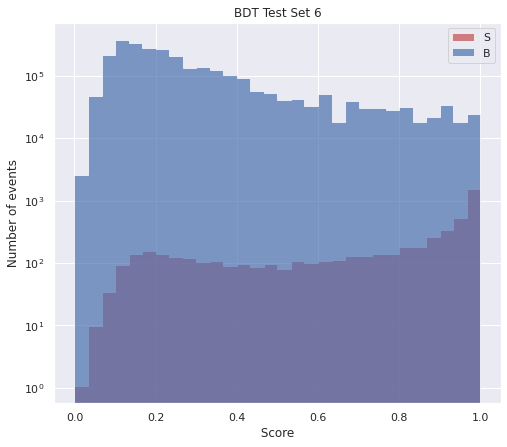

<Figure size 576x504 with 0 Axes>

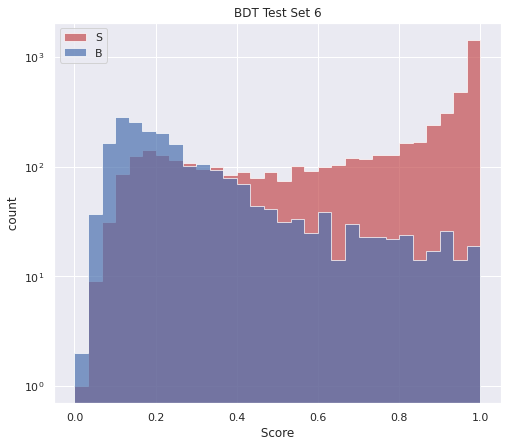

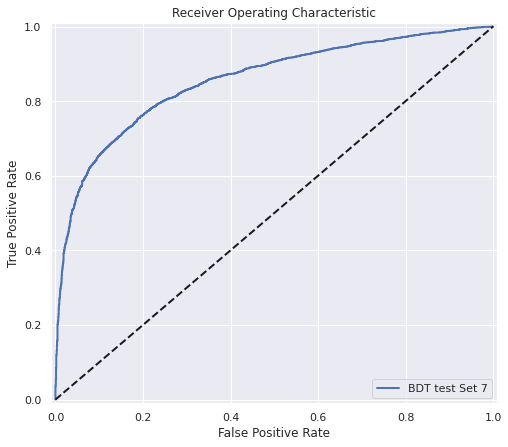

<Figure size 576x504 with 0 Axes>

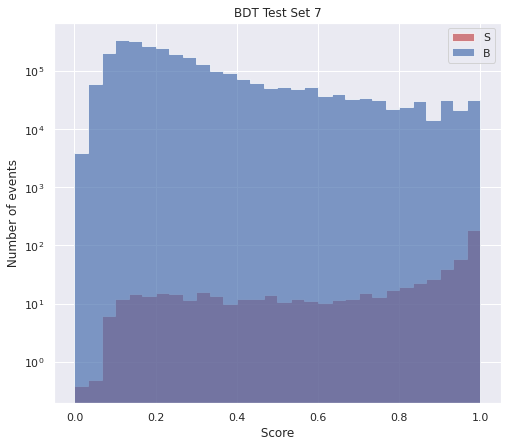

<Figure size 576x504 with 0 Axes>

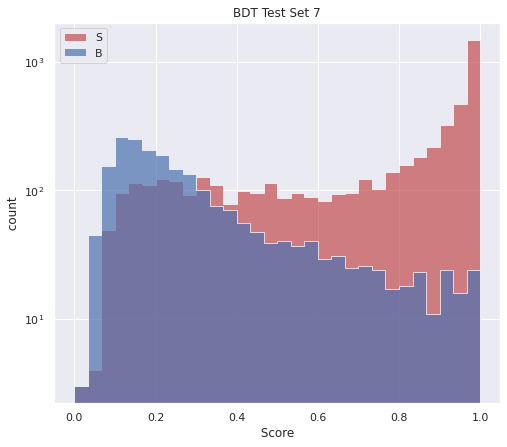

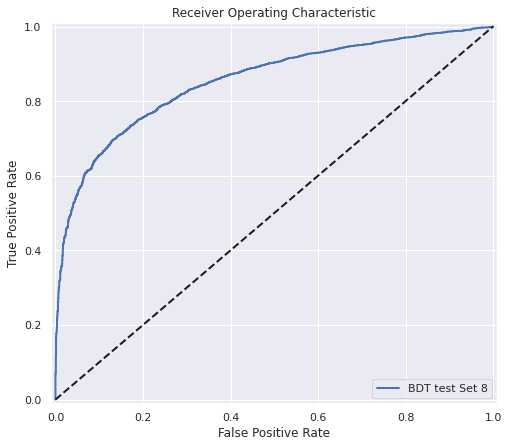

<Figure size 576x504 with 0 Axes>

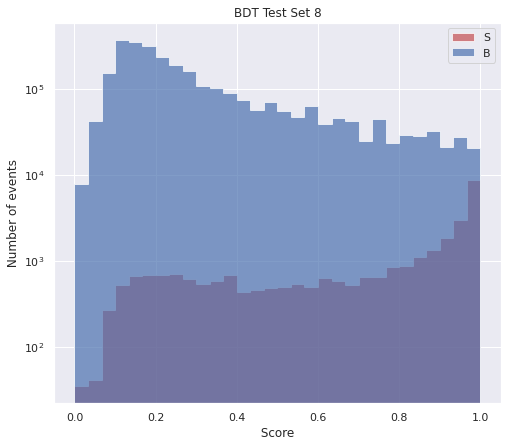

<Figure size 576x504 with 0 Axes>

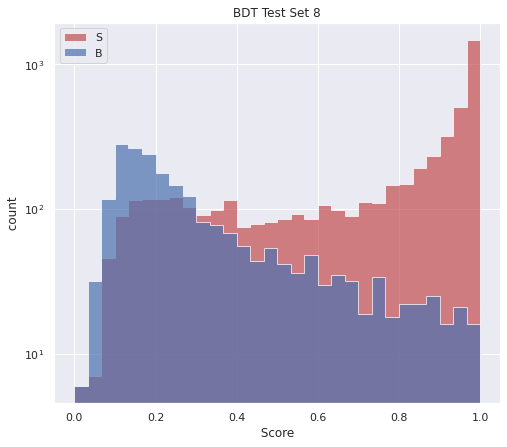

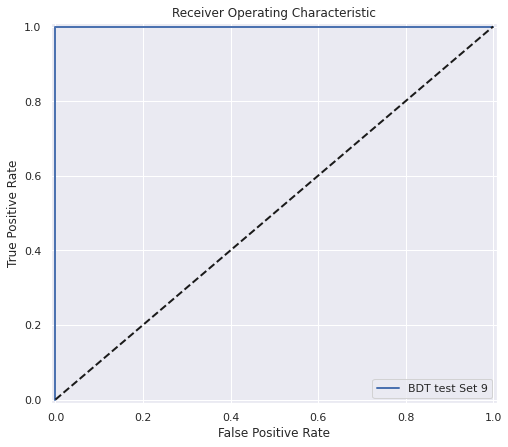

<Figure size 576x504 with 0 Axes>

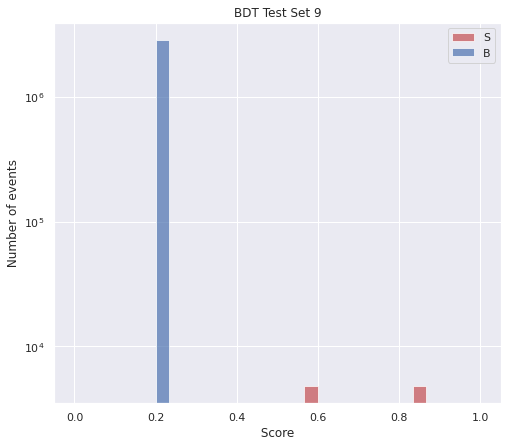

<Figure size 576x504 with 0 Axes>

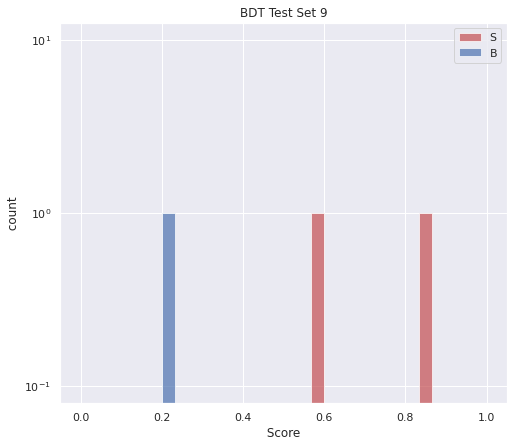

In [22]:
i = 0
for test_set in model.test_sets:
    roc_curve_(test_set['score'],test_set['labels'] ,test_set['weights'],plot_label = model.model_name + f" test Set {i}",color='b',lw = 2)

    events_histogram(test_set['score'],test_set['labels'] ,test_set['weights'],plot_label = model.model_name + f" Test Set {i}")

    score_histogram(test_set['score'],test_set['labels'] ,plot_label = model.model_name + f" Test Set {i}")
    i = i + 1

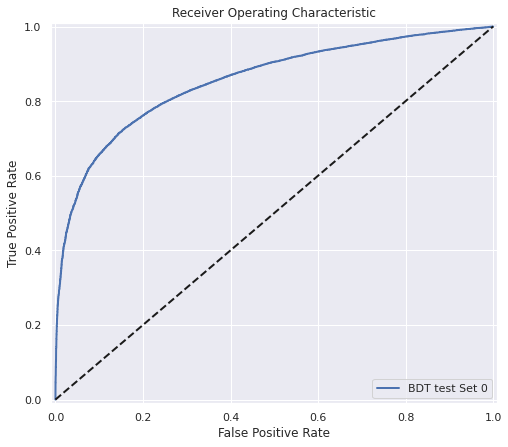

<Figure size 576x504 with 0 Axes>

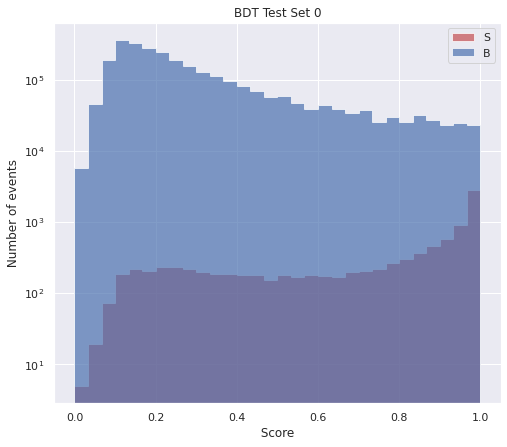

<Figure size 576x504 with 0 Axes>

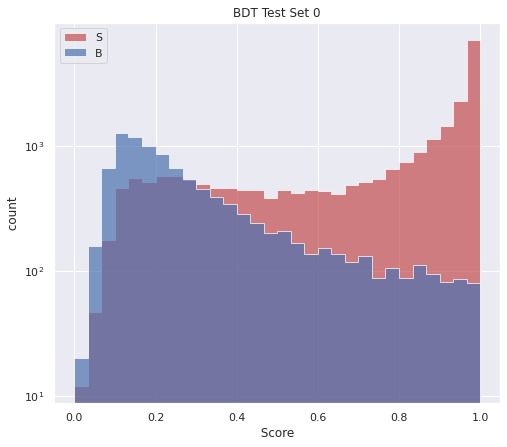

In [23]:
i = 0
for valid_set in model.validation_sets:
    roc_curve_(valid_set['score'],valid_set['labels'] ,valid_set['weights'],plot_label = model.model_name + f" test Set {i}",color='b',lw = 2)

    events_histogram(valid_set['score'],valid_set['labels'] ,valid_set['weights'],plot_label = model.model_name + f" Test Set {i}")

    score_histogram(valid_set['score'],valid_set['labels'] ,plot_label = model.model_name + f" Test Set {i}")
    i = i + 1

In [24]:
# Save result
ingestion.save_result()

# Stop timer
ingestion.stop_timer()

# Show duration
ingestion.show_duration()

[*] Saving result
[*] --- delta_mu_hat: 10.3233355839802
[*] --- mu_hats (avg): 1.6303475827519065

---------------------------------
[✔] Total duration: 0:03:05.415020
---------------------------------


## End